In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Preparation of Emoticon Data**

In [57]:
# read emoticon dataset
train_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_emoticon.csv")['input_emoticon'].tolist()

print(f"Train dataset size: ")
print(f"train_emoticon_X: {len(train_emoticon_X)} train_emoticon_Y: {len(train_emoticon_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_emoticon_X: {len(valid_emoticon_X)} valid_emoticon_Y: {len(valid_emoticon_Y)}")

print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")

Train dataset size: 
train_emoticon_X: 7080 train_emoticon_Y: 7080

Valid dataset size: 
valid_emoticon_X: 489 valid_emoticon_Y: 489

Test dataset size: 
test_emoticon_X: 2232


In [58]:
# Convert list to NumPy array
train_emoticon_X = np.array(train_emoticon_X)
valid_emoticon_X = np.array(valid_emoticon_X)
test_emoticon_X = np.array(test_emoticon_X)

train_emoticon_Y = np.array(train_emoticon_Y)
valid_emoticon_Y = np.array(valid_emoticon_Y)

print(type(train_emoticon_X))
print(type(train_emoticon_X[0]))

# Concatenate all lists into one
all_texts = ''.join(train_emoticon_X.flatten()) + ''.join(valid_emoticon_X.flatten()) + ''.join(test_emoticon_X.flatten())

# Get unique characters
unique_characters = np.unique(list(all_texts))
print(unique_characters)
# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}
print(unique_characters.shape)
print(len(char_to_index))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
['😀' '😁' '😂' '😃' '😄' '😅' '😆' '😇' '😈' '😉' '😊' '😋' '😌' '😍' '😎' '😏' '😐' '😑'
 '😒' '😓' '😔' '😕' '😖' '😗' '😘' '😙' '😚' '😛' '😜' '😝' '😞' '😟' '😠' '😡' '😢' '😣'
 '😤' '😥' '😦' '😧' '😨' '😩' '😪' '😫' '😬' '😭' '😮' '😯' '😰' '😱' '😲' '😳' '😴' '😵'
 '😶' '😷' '😸' '😹' '😺' '😻' '😼' '😽' '😾' '😿' '🙀' '🙁' '🙂' '🙃' '🙄' '🙅' '🙆' '🙇'
 '🙈' '🙉' '🙊' '🙋' '🙌' '🙍' '🙎' '🙏' '🙐' '🙑' '🙒' '🙓' '🙔' '🙕' '🙖' '🙗' '🙘' '🙙'
 '🙚' '🙛' '🙜' '🙝' '🙞' '🙟' '🙠' '🙡' '🙢' '🙣' '🙤' '🙥' '🙦' '🙧' '🙨' '🙩' '🙪' '🙫'
 '🙬' '🙭' '🙮' '🙯' '🙰' '🙱' '🙲' '🙳' '🙴' '🙵' '🙶' '🙷' '🙸' '🙹' '🙺' '🙻' '🙼' '🙽'
 '🙾' '🙿' '🚀' '🚁' '🚂' '🚃' '🚄' '🚅' '🚆' '🚇' '🚈' '🚉' '🚊' '🚋' '🚌' '🚍' '🚎' '🚏'
 '🚐' '🚑' '🚒' '🚓' '🚔' '🚕' '🚖' '🚗' '🚘' '🚙' '🚚' '🚛' '🚜' '🚝' '🚞' '🚟' '🚠' '🚡'
 '🚢' '🚣' '🚤' '🚥' '🚦' '🚧' '🚨' '🚩' '🚪' '🚫' '🚬' '🚭' '🚮' '🚯' '🚰' '🚱' '🚲' '🚳'
 '🚴' '🚵' '🚶' '🚷' '🚸' '🚹' '🚺' '🚻' '🚼' '🚽' '🚾' '🚿' '🛀' '🛁' '🛂' '🛃' '🛄' '🛅'
 '🛆' '🛇' '🛈' '🛉' '🛊' '🛋' '🛌' '🛍' '🛎' '🛏' '🛐' '🛑' '🛒' '🛓' '🛔' '🛕' '🛖' '🛗'
 '\U0001f6d8' '\U0001f6d9' '\U0001f6da' '\U0001f6db' '\U0001f6dc'
 '\U0001f6dd'

In [59]:
# Function to convert input emoticons to a 13x226 matrix
def one_hot_count_matrix(emoticon, max_len=13, num_classes=226):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len, num_classes))
    # Iterate through the characters in the emoticon
    for i, char in enumerate(emoticon):
        if char in char_to_index:  # Check if char exists in the mapping
            matrix[i, char_to_index[char]] = 1  # One-hot encoding
        else:
            print(f"Character '{char}' not found in char_to_index.")  # Optional: log missing characters
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
train_emoticon_X = np.array([one_hot_count_matrix(emoticon) for emoticon in train_emoticon_X])
valid_emoticon_X = np.array([one_hot_count_matrix(emoticon) for emoticon in valid_emoticon_X])
test_emoticon_X = np.array([one_hot_count_matrix(emoticon) for emoticon in test_emoticon_X])

print(train_emoticon_X.shape)
print(valid_emoticon_X.shape)
print(test_emoticon_X.shape)

(7080, 2938)
(489, 2938)
(2232, 2938)


# **Preparation of Feature Data**

In [60]:
# read feat dataset
train_feat = np.load("/content/drive/MyDrive/mini-project-1/datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

test_feat_X = np.load("/content/drive/MyDrive/mini-project-1/datasets/test/test_feature.npz", allow_pickle=True)['features']

valid_feat = np.load("/content/drive/MyDrive/mini-project-1/datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']


In [61]:
train_feat_X = np.array([feat for feat in train_feat_X])
valid_feat_X = np.array([feat for feat in valid_feat_X])
test_feat_X = np.array([feat for feat in test_feat_X])

train_feat_X = np.array([feat.flatten() for feat in train_feat_X])
valid_feat_X = np.array([feat.flatten() for feat in valid_feat_X])
test_feat_X = np.array([feat.flatten() for feat in test_feat_X])

print(train_feat_X.shape)
print(valid_feat_X.shape)
print(test_feat_X.shape)

(7080, 9984)
(489, 9984)
(2232, 9984)


# **preparation of Sequence Dataset**

In [62]:
# read text sequence dataset
train_seq_df = pd.read_csv('https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_text_seq.csv')
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

test_seq_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_text_seq.csv")['input_str'].tolist()

# read text sequence dataset
valid_seq_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_text_seq.csv")
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].tolist()


# Convert list to NumPy array
train_seq_X = np.array(train_seq_X)
valid_seq_X = np.array(valid_seq_X)
test_seq_X = np.array(test_seq_X)

# Convert labels to numpy arrays
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

In [63]:
# Get unique characters for two digits
unique_characters = [f"{i:02d}" for i in range(100)]  # ['00', '01', ..., '99']
num_classes = len(unique_characters)  # 100 classes

# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}

# Function to convert input seqs to a 49x100 matrix using overlapping pairs
def one_hot_count_matrix(seq, max_len=50):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len - 1, num_classes))  # 49x100 matrix for overlapping pairs
    # Extract overlapping pairs and update the matrix
    for i in range(0, max_len - 1):  # Loop from seq[0:2] to seq[48:50]
        char_pair = seq[i:i + 2]  # Get overlapping pairs of characters
        if char_pair in char_to_index:
            index = char_to_index[char_pair]
            matrix[i, index] = 1  # One-hot encoding
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
train_seq_X = np.array([one_hot_count_matrix(seq) for seq in train_seq_X])
valid_seq_X = np.array([one_hot_count_matrix(seq) for seq in valid_seq_X])
test_seq_X = np.array([one_hot_count_matrix(seq) for seq in test_seq_X])

print(train_seq_X.shape)  # Expected shape: (N_train, 4900)
print(valid_seq_X.shape)  # Expected shape: (N_valid, 4900)
print(test_seq_X.shape)  # Expected shape: (N_test, 4900)


(7080, 4900)
(489, 4900)
(2232, 4900)


# **Final Data Set**

In [64]:
X_train = np.concatenate((train_emoticon_X, train_feat_X, train_seq_X), axis=1)
X_valid = np.concatenate((valid_emoticon_X, valid_feat_X, valid_seq_X), axis=1)
X_test = np.concatenate((test_emoticon_X, test_feat_X, test_seq_X), axis=1)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

Y_train = train_emoticon_Y
Y_valid = valid_emoticon_Y

num_features = 2938 + 9984 + 4900
print(f"no.of features : {num_features}")


(7080, 17822)
(489, 17822)
(2232, 17822)
no.of features : 17822


# **Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, Y_train)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Train Accuracy with Logistic Regression: 1.0
Validation Accuracy with Logistic Regression: 0.967280163599182
F1 Score with Logistic Regression: 0.9672837237943108
Number of trainable parameters: 17823


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20                1.0             0.922290
1          40                1.0             0.936605
2          60                1.0             0.957055
3          80                1.0             0.957055
4         100                1.0             0.967280


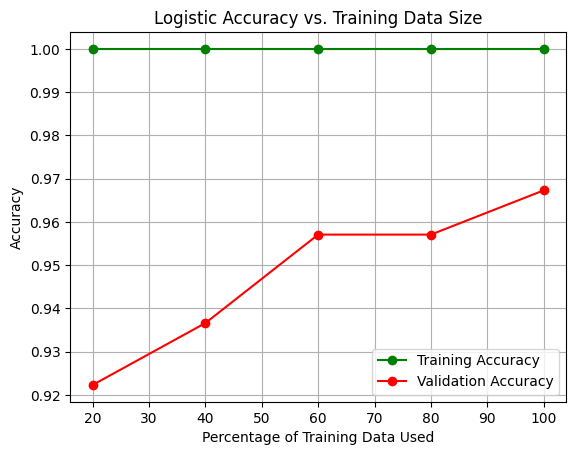

In [66]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = Y_train
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(Y_valid, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# **KNN**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, Y_train)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")


Train Accuracy with KNN: 0.8076271186440678
Validation Accuracy with KNN: 0.6625766871165644
F1 Score with KNN Regression: 0.6625540853414775


# **LwP**

In [68]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, Y_train)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with LWP Regression: {f1}")

Train Accuracy with LWP: 0.9467514124293785
Validation Accuracy with LWP: 0.9427402862985685
F1 Score with LWP Regression: 0.9427508278358189


# **SVM Classifier**

In [54]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, Y_train)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

# Calculate validation accuracy
valid_accuracy = accuracy_score(Y_valid, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

f1 = f1_score(Y_valid, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Train Accuracy with SVM: 1.0
Validation Accuracy with SVM: 0.9488752556237219
F1 Score with SVM: 0.9488846635773512
Number of trainable parameters: 17823


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20                1.0             0.905930
1          40                1.0             0.918200
2          60                1.0             0.944785
3          80                1.0             0.948875
4         100                1.0             0.948875


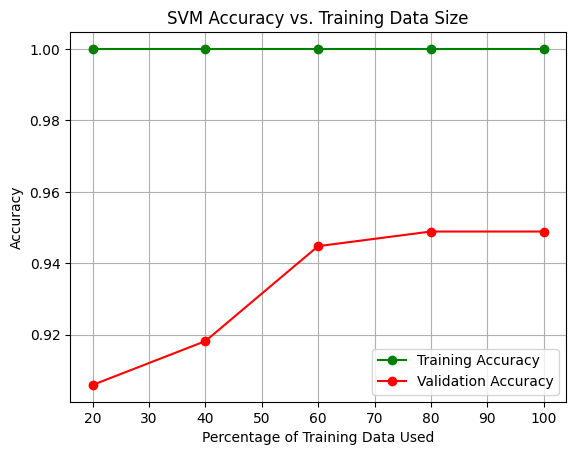

In [55]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = Y_train
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(Y_valid, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()